### Importando pandas

In [1]:
import pandas as pd


### Importando Database

In [2]:
from sqlalchemy import create_engine

### Criando a conexão

In [3]:
import pymysql
import urllib.parse

# Definir as credenciais
user = 'root'
password = urllib.parse.quote_plus('senai@123')
host = 'localhost'
database = 'schooltracker'

# Criar URL de conexão

connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Criar conexão com o create_engine()
engine = create_engine(connection_string)

# Escrever consulta SQL

query_alunos = "SELECT * FROM aluno"
query_diario = "SELECT * FROM diariobordo"
query_avaliacao = "SELECT * FROM avaliacao"

# Criar DataFrame

df_alunos = pd.read_sql(query_alunos, engine)

# Mostrar 5 primeiros
df_alunos.head()

,id,ra,nome,tempo_de_estudo,renda_media_familia
0,114,00034548,None,NaN,NaN
1,115,00034549,None,NaN,NaN
2,116,00034547,None,NaN,NaN
3,117,00034546,None,NaN,NaN
4,118,00034550,None,NaN,NaN


#### Quais a bibliotecas um cientista de dados utiliza?
- Pandas;
- NumPy;
- Fundamentos de IA (Scikit-learn)

#### Material didático
- Pandas e NumPy (Notebook)
- Scikit-Learn (Apostila do SENAI)

##### Pandas: ciência de dados
##### Scikit-Learn: elaboração de modelos de IA
##### NumPy: Matemática


05/08/2024

- Carregar dados (ok)

- Salvar um dataframe

In [4]:
csv_file = 'alunos.csv'
df_alunos.to_csv(csv_file, index=False) # Precisa desses dois paramêtros

# Exercício - Salve o DataFrame no formato JSON

In [5]:
json_file = 'alunos.json'
df_alunos.to_json(json_file, index=False)

In [6]:
excel_file = 'planilha_alunos.xlsx'
df_alunos.to_excel(excel_file, index=False)

In [7]:
df_alunos.columns

Index(['id', 'ra', 'nome', 'tempo_de_estudo', 'renda_media_familia'], dtype='object')

In [8]:
df_tempo_renda = df_alunos[['tempo_de_estudo', 'renda_media_familia']]
df_tempo_renda

,tempo_de_estudo,renda_media_familia
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
101,495.0,1300000.0
102,505.0,1320000.0
103,515.0,1340000.0
104,525.0,1360000.0


# Revisando funções básicas

## 06/08/2024
- Exercício 01 - Retorne o dataframe da última aula com as duas primeiras linhas como amostras.

In [9]:
df_tempo_renda.head(2)
# df_tempo_renda[:2]

,tempo_de_estudo,renda_media_familia
0,NaN,NaN
1,NaN,NaN


- Exercício 02 - Retorne o dataframe da última aula com as duas últimas linhas como amostras.

In [10]:
df_tempo_renda.tail(2)


,tempo_de_estudo,renda_media_familia
104,525.0,1360000.0
105,535.0,1380000.0


- Exercício 03 - Retorne uma tupla com o número de linhas e colunas.

In [11]:
df_tempo_renda.shape # Retorna a tupla

(106, 2)

- Exercício 04 - Retorne as informações gerais do dataframe.

In [12]:
df_tempo_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tempo_de_estudo      52 non-null     float64
 1   renda_media_familia  52 non-null     float64
dtypes: float64(2)
memory usage: 1.8 KB


In [13]:
qtd = len(df_tempo_renda)
if qtd <= 106:
    print(f'Quantidade: {qtd} dentro do ideal')

Quantidade: 106 dentro do ideal


- Exercício 05 - Retorne as colunas.

In [14]:
df_tempo_renda.columns

Index(['tempo_de_estudo', 'renda_media_familia'], dtype='object')

- Exercício 06 - Retorne as informações apenas da coluna renda familiar.

In [15]:
df_tempo_renda['renda_media_familia'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 106 entries, 0 to 105
Series name: renda_media_familia
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 980.0 bytes


- Exercício 07 - Mostre os tipos com dtypes

In [16]:
df_alunos.dtypes

id                       int64
ra                      object
nome                    object
tempo_de_estudo        float64
renda_media_familia    float64
dtype: object

- Estatística

In [17]:
df_alunos.describe() # Faz um resumo, contagem, média, minimo, etc.

,id,tempo_de_estudo,renda_media_familia
count,106.000000,52.000000,5.200000e+01
mean,166.500000,285.596154,8.621538e+05
std,30.743563,144.807683,3.262689e+05
min,114.000000,10.000000,2.000000e+03
25%,140.250000,153.750000,6.150000e+05
50%,166.500000,280.000000,8.700000e+05
75%,192.750000,407.500000,1.125000e+06
max,219.000000,535.000000,1.380000e+06


- Exercício 08 - Crie u dataframe da tabela diário de bordo e mostre os valores.

In [18]:

df_diario = pd.read_sql(query_diario, engine)
df_avaliacao = pd.read_sql(query_avaliacao, engine)

In [19]:
df_diario.head() # Lê os 5 primeiros campos da tabela

,id,texto,datahora,fk_aluno_id
0,120,"Hoje estamos aprendendo MySql, comandos como U...",2024-07-31 15:47:50,150
1,121,Hoje tivemos uma segunda aula sobre banco de d...,2024-07-31 17:45:00,167
2,122,Aula sobre dataframe É importante!,2024-08-06 15:47:50,151
3,123,Aula de revisao do pandas É importante!,2024-08-06 15:43:00,152
4,124,Aula de revisao do SQL!,2024-08-06 16:00:00,153


In [20]:
df_avaliacao.shape # Retorna uma tupla com a qtd de linhas e colunas

(47, 6)

In [21]:
df_avaliacao.columns

Index(['id', 'nota2', 'nota1', 'nota3', 'nota4', 'fk_aluno_id'], dtype='object')

In [22]:
df_avaliacao.describe()

,id,nota2,nota1,nota3,nota4,fk_aluno_id
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,29.000000,21.297872,18.680851,22.042553,24.234043,165.659574
std,13.711309,1.196279,1.770610,1.062349,0.839585,15.956839
min,6.000000,20.000000,16.000000,20.000000,21.000000,120.000000
25%,17.500000,20.000000,17.000000,22.000000,24.000000,166.000000
50%,29.000000,21.000000,19.000000,22.000000,24.000000,169.000000
75%,40.500000,22.000000,20.000000,23.000000,25.000000,174.000000
max,52.000000,25.000000,25.000000,25.000000,25.000000,179.000000


In [23]:
df_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           47 non-null     int64
 1   nota2        47 non-null     int64
 2   nota1        47 non-null     int64
 3   nota3        47 non-null     int64
 4   nota4        47 non-null     int64
 5   fk_aluno_id  47 non-null     int64
dtypes: int64(6)
memory usage: 2.3 KB


### Gerando um arquivo EXCEL

In [24]:
alunos_excel = 'planilha_avaliacao.xlsx' # cria a variavel e de um nome pra sua planilha com a extensão
df_avaliacao.to_excel(alunos_excel, index=False) # Passe 2 parametros

- Exercício 09 - Faça um join no pandas similar ao do SQL.

# Fazendo um join 

In [25]:
len(df_diario)

25

In [26]:
len(df_alunos)

106

In [27]:
df_diario[0:26]

,id,texto,datahora,fk_aluno_id
0,120,"Hoje estamos aprendendo MySql, comandos como U...",2024-07-31 15:47:50,150
1,121,Hoje tivemos uma segunda aula sobre banco de d...,2024-07-31 17:45:00,167
2,122,Aula sobre dataframe É importante!,2024-08-06 15:47:50,151
3,123,Aula de revisao do pandas É importante!,2024-08-06 15:43:00,152
4,124,Aula de revisao do SQL!,2024-08-06 16:00:00,153
5,125,Hoje praticamos SQL com ênfase em funções de a...,2024-08-01 09:30:00,172
6,126,Fizemos exercícios sobre normalização de banco...,2024-08-02 14:00:00,165
7,127,Aprendemos sobre índices e como eles afetam a ...,2024-08-03 16:15:00,178
8,128,Estudamos as diferenças entre tipos de joins e...,2024-08-04 11:00:00,170
9,129,Realizamos um projeto de grupo para criar um b...,2024-08-05 13:45:00,169


### Passos para o merge
- Use o comando merge;
- Criar uma variável - resultado;
- pd.merge(dataframe1, datafreme2) - queremos juntar, (tipo_uniao, chave da esquerda, chave da direita); 
- Qual o tipo de união: how='inner';
- O parâmetro how define o tipo de join que estamos realizando;
- inner significa que queremos um join interno, o que resulta em apenas as linhas que têm correspondência em ambos os DataFrames.

In [28]:
resultado = pd.merge(df_diario, df_alunos, how='left', left_on='fk_aluno_id', right_on='id')
resultado.head()

,id_x,texto,datahora,fk_aluno_id,id_y,ra,nome,tempo_de_estudo,renda_media_familia
0,120,"Hoje estamos aprendendo MySql, comandos como U...",2024-07-31 15:47:50,150,150,00034582,None,NaN,NaN
1,121,Hoje tivemos uma segunda aula sobre banco de d...,2024-07-31 17:45:00,167,167,00118544,None,NaN,NaN
2,122,Aula sobre dataframe É importante!,2024-08-06 15:47:50,151,151,00034583,None,NaN,NaN
3,123,Aula de revisao do pandas É importante!,2024-08-06 15:43:00,152,152,00034584,None,NaN,NaN
4,124,Aula de revisao do SQL!,2024-08-06 16:00:00,153,153,00034585,None,NaN,NaN


### Pesquiso quais colunas eu quero mostrar

In [29]:
resultado_selecionado = resultado[['nome','ra', 'texto']]
resultado_selecionado.head()

,nome,ra,texto
0,None,00034582,"Hoje estamos aprendendo MySql, comandos como U..."
1,None,00118544,Hoje tivemos uma segunda aula sobre banco de d...
2,None,00034583,Aula sobre dataframe É importante!
3,None,00034584,Aula de revisao do pandas É importante!
4,None,00034585,Aula de revisao do SQL!


- Exercício 10 - Crie uma junção do dataframe aluno com avaliação. Mostre as notas e o RA do aluno.

In [30]:
resultado2 = pd.merge(df_avaliacao, df_alunos, how='left', left_on='fk_aluno_id', right_on='id')
resultado2.head(5)

,id_x,nota2,nota1,nota3,nota4,fk_aluno_id,id_y,ra,nome,tempo_de_estudo,renda_media_familia
0,6,22,20,25,25,120,120,00034552,None,NaN,NaN
1,7,20,22,23,24,121,121,00034553,None,NaN,NaN
2,8,22,20,22,21,122,122,00034554,None,NaN,NaN
3,9,25,25,25,25,123,123,00034555,None,NaN,NaN
4,10,22,20,20,25,124,124,00034556,None,NaN,NaN


In [31]:
resultado_selecionado2 = resultado2[['ra', 'nota1', 'nota2', 'nota3', 'nota4']]
resultado_selecionado2.head(10)

,ra,nota1,nota2,nota3,nota4
0,00034552,20,22,25,25
1,00034553,22,20,23,24
2,00034554,20,22,22,21
3,00034555,25,25,25,25
4,00034556,20,22,20,25
5,00034603,18,20,22,25
6,00034597,16,20,21,23
7,00034609,19,21,23,24
8,00034601,20,22,20,25
9,00034600,17,23,22,24


# Pandas (funções agregadas)
### O web scraping ou "raspagem de dados"

In [32]:
! pip install lxml

In [33]:
! pip install html5lib

In [34]:
! pip install beautifulsoup4

In [35]:
url = 'https://www.terra.com.br/esportes/futebol/brasileiro-serie-a/tabela/#google_vignette'
tabela_seriea = pd.read_html(url, encoding='UTF-8')
tabela_brasileirao = tabela_seriea[0]
tabela_brasileirao

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
0,1,NaN,Botafogo >>,Subiu1,43,21,13,4,4,35,20,15,68
1,2,NaN,Flamengo >>,Desceu1,40,20,12,4,4,34,20,14,66
2,3,NaN,Fortaleza >>,Subiu1,39,20,11,6,3,26,19,7,65
3,4,NaN,Palmeiras >>,Desceu1,37,21,11,4,6,28,17,11,58
4,5,NaN,Cruzeiro >>,NaN,35,20,11,2,7,29,22,7,58
5,6,NaN,São Paulo >>,NaN,35,21,10,5,6,29,21,8,55
6,7,NaN,Bahia >>,NaN,32,21,9,5,7,29,25,4,50
7,8,NaN,Athletico-PR >>,NaN,28,19,8,4,7,22,20,2,49
8,9,NaN,Atlético-MG >>,NaN,28,19,7,7,5,28,28,0,49
9,10,NaN,Bragantino >>,NaN,26,19,7,5,7,24,23,1,45


### Tipo da variável

In [36]:
type(tabela_brasileirao)

pandas.core.frame.DataFrame

In [37]:
""" 

url_imc = 'https://www.tuasaude.com/imc/'
table = pd.read_html(url_imc)
tabela_imc = table[0]
tabela_imc

"""


" \n\nurl_imc = 'https://www.tuasaude.com/imc/'\ntable = pd.read_html(url_imc)\ntabela_imc = table[0]\ntabela_imc\n\n"

In [38]:
tabela_brasileirao.tail()

,Times,Times.1,Times.2,Times.3,P,J,V,E,D,GP,GC,SG,%
15,16,NaN,Internacional >>,Desceu2,21,16,5,6,5,14,14,0,43
16,17,NaN,Fluminense >>,Subiu2,20,20,5,5,10,16,24,-8,33
17,18,NaN,Corinthians >>,Desceu3,20,21,4,8,9,19,28,-9,31
18,19,NaN,Cuiabá >>,Desceu1,17,19,4,5,10,19,25,-6,29
19,20,NaN,Atlético Goianiense >>,NaN,12,21,2,6,13,17,35,-18,19


In [39]:
tabela_brasileirao.shape

(20, 13)

In [40]:
tabela_brasileirao.columns

Index(['Times', 'Times.1', 'Times.2', 'Times.3', 'P', 'J', 'V', 'E', 'D', 'GP',
       'GC', 'SG', '%'],
      dtype='object')

In [41]:
tabela_brasileirao = tabela_brasileirao.drop(columns=['Times', 'Times.1', 'Times.3'])
tabela_brasileirao

,Times.2,P,J,V,E,D,GP,GC,SG,%
0,Botafogo >>,43,21,13,4,4,35,20,15,68
1,Flamengo >>,40,20,12,4,4,34,20,14,66
2,Fortaleza >>,39,20,11,6,3,26,19,7,65
3,Palmeiras >>,37,21,11,4,6,28,17,11,58
4,Cruzeiro >>,35,20,11,2,7,29,22,7,58
5,São Paulo >>,35,21,10,5,6,29,21,8,55
6,Bahia >>,32,21,9,5,7,29,25,4,50
7,Athletico-PR >>,28,19,8,4,7,22,20,2,49
8,Atlético-MG >>,28,19,7,7,5,28,28,0,49
9,Bragantino >>,26,19,7,5,7,24,23,1,45


In [42]:
tabela_brasileirao[['Times.2', 'V']]

,Times.2,V
0,Botafogo >>,13
1,Flamengo >>,12
2,Fortaleza >>,11
3,Palmeiras >>,11
4,Cruzeiro >>,11
5,São Paulo >>,10
6,Bahia >>,9
7,Athletico-PR >>,8
8,Atlético-MG >>,7
9,Bragantino >>,7


In [43]:
tabela_brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Times.2  20 non-null     object
 1   P        20 non-null     int64 
 2   J        20 non-null     int64 
 3   V        20 non-null     int64 
 4   E        20 non-null     int64 
 5   D        20 non-null     int64 
 6   GP       20 non-null     int64 
 7   GC       20 non-null     int64 
 8   SG       20 non-null     int64 
 9   %        20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


### Estátistica descritiva

In [44]:
tabela_brasileirao.describe()

,P,J,V,E,D,GP,GC,SG,%
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27.25000,19.800000,7.450000,4.900000,7.450000,24.000000,24.00000,0.000000,45.350000
std,8.57705,1.239694,3.051747,1.552587,2.723678,5.973626,5.30144,8.687559,13.468384
min,12.00000,16.000000,2.000000,2.000000,3.000000,14.000000,14.00000,-18.000000,19.000000
25%,21.00000,19.000000,5.000000,4.000000,5.750000,19.000000,20.00000,-6.500000,35.250000
50%,25.00000,20.000000,7.000000,5.000000,7.000000,23.500000,23.50000,0.000000,44.000000
75%,35.00000,21.000000,10.250000,6.000000,10.000000,28.250000,28.00000,7.000000,55.750000
max,43.00000,21.000000,13.000000,8.000000,13.000000,35.000000,35.00000,15.000000,68.000000


In [45]:
tabela_brasileirao['%'].mean()

np.float64(45.35)

# Renomar coluna

In [47]:
tabela_brasileirao.rename(columns={'Times.2':'Times'}, inplace=True)
tabela_brasileirao

,Times,P,J,V,E,D,GP,GC,SG,%
0,Botafogo >>,43,21,13,4,4,35,20,15,68
1,Flamengo >>,40,20,12,4,4,34,20,14,66
2,Fortaleza >>,39,20,11,6,3,26,19,7,65
3,Palmeiras >>,37,21,11,4,6,28,17,11,58
4,Cruzeiro >>,35,20,11,2,7,29,22,7,58
5,São Paulo >>,35,21,10,5,6,29,21,8,55
6,Bahia >>,32,21,9,5,7,29,25,4,50
7,Athletico-PR >>,28,19,8,4,7,22,20,2,49
8,Atlético-MG >>,28,19,7,7,5,28,28,0,49
9,Bragantino >>,26,19,7,5,7,24,23,1,45


# Usando o Replace

In [48]:
tabela_brasileirao['Times'] = tabela_brasileirao['Times'].str.replace('>' , '', regex=False)
tabela_brasileirao

,Times,P,J,V,E,D,GP,GC,SG,%
0,Botafogo,43,21,13,4,4,35,20,15,68
1,Flamengo,40,20,12,4,4,34,20,14,66
2,Fortaleza,39,20,11,6,3,26,19,7,65
3,Palmeiras,37,21,11,4,6,28,17,11,58
4,Cruzeiro,35,20,11,2,7,29,22,7,58
5,São Paulo,35,21,10,5,6,29,21,8,55
6,Bahia,32,21,9,5,7,29,25,4,50
7,Athletico-PR,28,19,8,4,7,22,20,2,49
8,Atlético-MG,28,19,7,7,5,28,28,0,49
9,Bragantino,26,19,7,5,7,24,23,1,45


# Gráfico

In [49]:
grafico_percent = tabela_brasileirao.groupby('Times')['%'].sum().sort_values()

<Axes: ylabel='Times'>

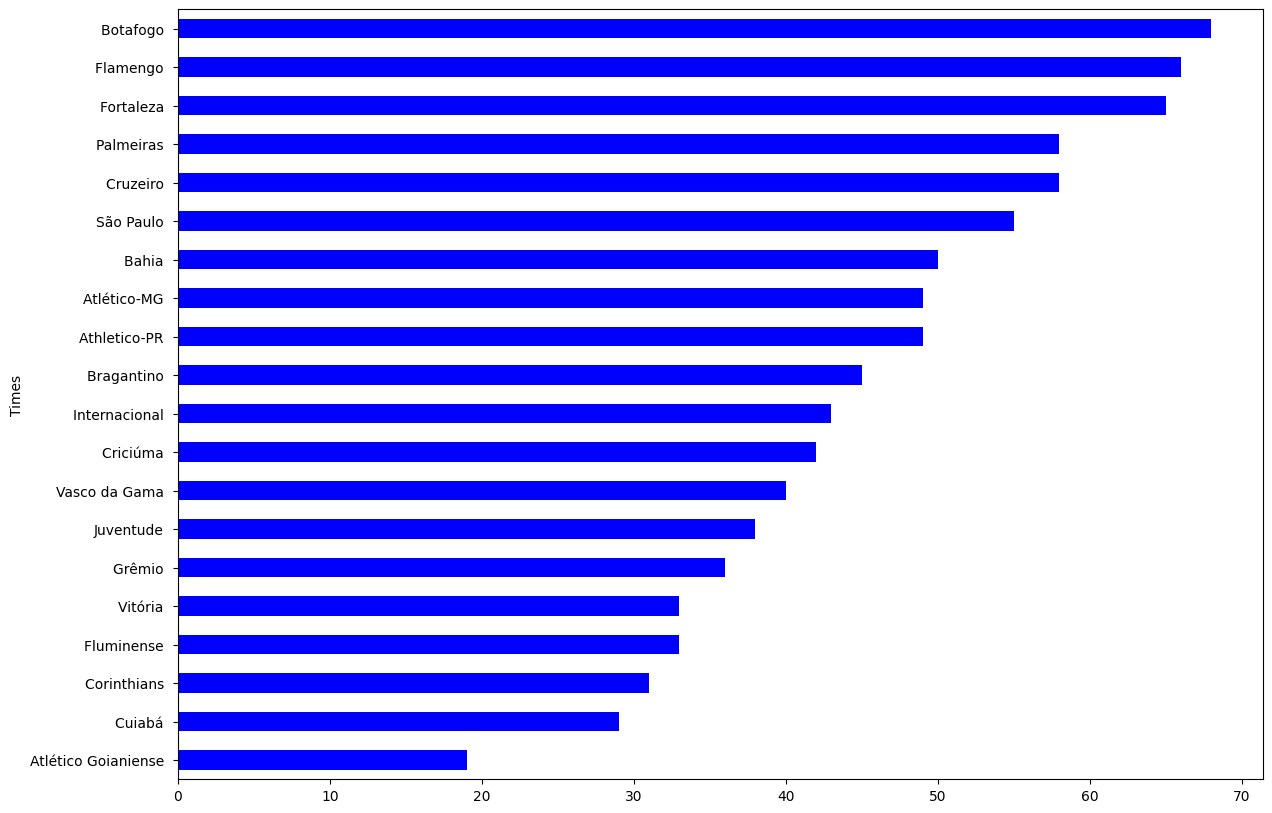

In [53]:
import matplotlib as plt

grafico_percent.plot(kind='barh', figsize=(14,10), color='blue')